## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.2, 0.8]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_ratio in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "exp-l2-%s" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

50000/50000 [==============================] - 7s 137us/step - loss: 1.1256 - accuracy: 0.5969 - val_loss: 1.2816 - val_accuracy: 0.5442
Epoch 47/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.1132 - accuracy: 0.6060 - val_loss: 1.2909 - val_accuracy: 0.5418
Epoch 48/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.1046 - accuracy: 0.6078 - val_loss: 1.2902 - val_accuracy: 0.5504
Epoch 49/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.0982 - accuracy: 0.6095 - val_loss: 1.2874 - val_accuracy: 0.5488
Epoch 50/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.0900 - accuracy: 0.6115 - val_loss: 1.2922 - val_accuracy: 0.5422
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
____________________________________________________

50000/50000 [==============================] - 6s 130us/step - loss: 1.2972 - accuracy: 0.5350 - val_loss: 1.3083 - val_accuracy: 0.5383
Epoch 42/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.2907 - accuracy: 0.5386 - val_loss: 1.3294 - val_accuracy: 0.5255
Epoch 43/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2826 - accuracy: 0.5420 - val_loss: 1.3067 - val_accuracy: 0.5323
Epoch 44/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.2742 - accuracy: 0.5447 - val_loss: 1.3162 - val_accuracy: 0.5293
Epoch 45/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2691 - accuracy: 0.5468 - val_loss: 1.3234 - val_accuracy: 0.5288
Epoch 46/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2618 - accuracy: 0.5515 - val_loss: 1.3236 - val_accuracy: 0.5276
Epoch 47/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2566 - accuracy: 0.5499 - val_loss:

50000/50000 [==============================] - 7s 132us/step - loss: 2.2791 - accuracy: 0.1328 - val_loss: 2.2799 - val_accuracy: 0.1489
Epoch 34/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.2751 - accuracy: 0.1354 - val_loss: 2.2791 - val_accuracy: 0.1531
Epoch 35/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2740 - accuracy: 0.1350 - val_loss: 2.2730 - val_accuracy: 0.1590
Epoch 36/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2682 - accuracy: 0.1386 - val_loss: 2.2765 - val_accuracy: 0.1524
Epoch 37/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2652 - accuracy: 0.1403 - val_loss: 2.2706 - val_accuracy: 0.1550
Epoch 38/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2633 - accuracy: 0.1417 - val_loss: 2.2713 - val_accuracy: 0.1483
Epoch 39/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2622 - accuracy: 0.1405 - val_loss:

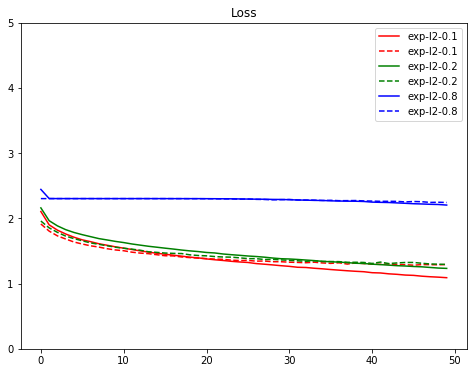

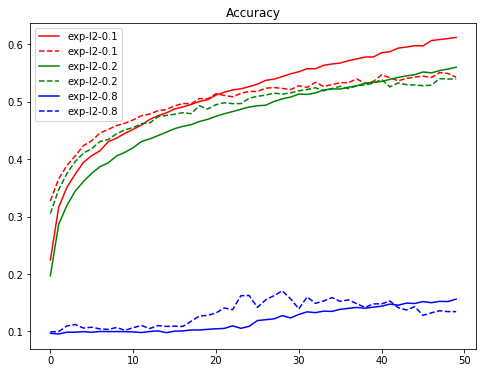

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()